<center style="font-size: 30px;">Lab5</center>

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Завантаження даних
data  = pd.read_csv(r"D:\programming\2024-2025\Data-analytics-methods-and-technologies\lab1\BankChurners.csv")
# Вибір ознак та міток
features = data[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']]
labels = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [6]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels, test_size=0.3, random_state=42, stratify=labels
)


In [8]:
# Список для збереження точностей
accuracies = []

# Перебір значень k від 1 до 30
k_range = range(1, 31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Пошук мінімального k з точністю >= 85%
optimal_k = None
for k, acc in zip(k_range, accuracies):
    if acc >= 0.85:
        optimal_k = k
        break

if optimal_k:
    print(f'Мінімальне значення k для точності не менше 85%: k = {optimal_k}')
else:
    print('Не вдалося досягти точності 85% при k до 30.')


Мінімальне значення k для точності не менше 85%: k = 1


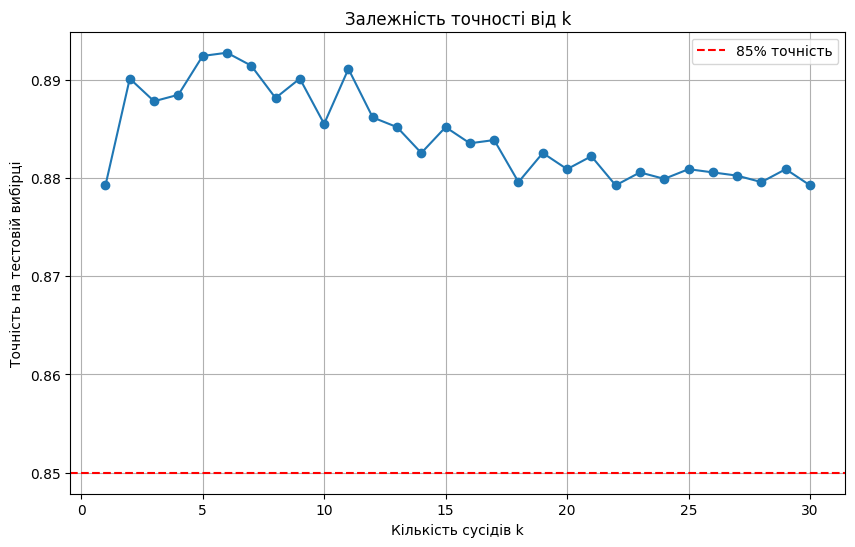

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% точність')
plt.xlabel('Кількість сусідів k')
plt.ylabel('Точність на тестовій вибірці')
plt.title('Залежність точності від k')
plt.legend()
plt.grid()
plt.show()


In [10]:
if optimal_k:
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_optimal.fit(X_train, y_train)
    y_test_pred = knn_optimal.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Точність на тестовій вибірці з k = {optimal_k}: {test_accuracy:.2f}')


Точність на тестовій вибірці з k = 1: 0.88


In [11]:
if optimal_k:
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
    cv_scores = cross_val_score(knn_optimal, features_scaled, labels, cv=3, scoring='accuracy')
    print(f'Точності при крос-валідації на 3 блоках: {cv_scores}')
    print(f'Середня точність крос-валідації: {cv_scores.mean():.2f}')


Точності при крос-валідації на 3 блоках: [0.54917062 0.89751185 0.87911111]
Середня точність крос-валідації: 0.78
